In [1]:
import numpy as np
import pandas 
from matplotlib import pyplot as plt, cm as cmap

In [2]:
### Constants
AIR_DENSITY     = 1.225         * 1e0   # kg/m**3
AIR_VISCOSITY   = 1.7894e-5     * 1e0   # kg/m/s  or Pa*s (Dynamic)


# AIR_DENSITY = 1.1368

In [3]:
### Config
MEAN_CHORD      = 250           * 1e-3  # mm
WINGSPAN        = 1400          * 1e-3  # mm
ASPECT_RATIO    = WINGSPAN/MEAN_CHORD


In [4]:
alpha,reynolds,cl,cd,cm = np.load("tkv2008_analysis_3.npy",allow_pickle=True)

In [5]:
velocity = AIR_VISCOSITY * reynolds / AIR_DENSITY / MEAN_CHORD

In [6]:
reynolds

array([  30000.,   40000.,   50000.,   60000.,   70000.,   80000.,
         90000.,  100000.,  115000.,  130000.,  145000.,  160000.,
        180000.,  200000.,  250000.,  300000.,  400000.,  500000.,
        750000., 1000000., 2000000., 3000000.])

In [7]:
velocity

array([  1.75288163,   2.33717551,   2.92146939,   3.50576327,
         4.09005714,   4.67435102,   5.2586449 ,   5.84293878,
         6.71937959,   7.59582041,   8.47226122,   9.34870204,
        10.5172898 ,  11.68587755,  14.60734694,  17.52881633,
        23.3717551 ,  29.21469388,  43.82204082,  58.42938776,
       116.85877551, 175.28816327])

In [8]:
pandas.DataFrame(np.array([reynolds,velocity]).T)

,0,1
0,30000.0,1.752882
1,40000.0,2.337176
2,50000.0,2.921469
3,60000.0,3.505763
4,70000.0,4.090057
5,80000.0,4.674351
6,90000.0,5.258645
7,100000.0,5.842939
8,115000.0,6.719380
9,130000.0,7.595820


In [9]:
idrag = 0.035
efficiency = 1/(1+idrag)

In [10]:
efficiency

0.9661835748792271

In [11]:
CL = np.zeros(cl.shape)
for index,rey in enumerate(reynolds):
    cl_r = cl[:,index]
    alpha_zero = np.nanargmin(np.abs(cl_r))
    cl_prime = cl_r[1:]-cl_r[:-1]

    a0 = np.insert(cl_prime,alpha_zero,0)
    # a = a0/np.sqrt(1+(a0/np.pi/ASPECT_RATIO)**2+(a0/np.pi/ASPECT_RATIO))
    a = a0/(1+(a0*180/np.pi/(np.pi*ASPECT_RATIO*efficiency)))
    for alph_forward in range(alpha_zero+1,cl.shape[0]):
        CL[alph_forward,index] = CL[alph_forward-1,index] + a[alph_forward]
    for alph_backward in range(alpha_zero-1,-1,-1):
        CL[alph_backward,index] = CL[alph_backward+1,index] - a[alph_backward]

In [12]:
CD = cd + CL**2/np.pi/efficiency/ASPECT_RATIO

In [13]:
CM = cm

In [17]:
np.save('coef.npy',[alpha,reynolds,CL,CD,CM],allow_pickle=True)

C:\Users\HDIAS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [33]:
l = AIR_DENSITY * velocity**2 * MEAN_CHORD      * WINGSPAN * CL / 2
d = AIR_DENSITY * velocity**2 * MEAN_CHORD      * WINGSPAN * CD / 2
m = AIR_DENSITY * velocity**2 * MEAN_CHORD**2   * WINGSPAN * CM / 2

In [34]:
velocity[np.nanargmin(np.abs(velocity-15))]

15.74067558057706

In [35]:
l[np.nanargmin(np.abs(alpha-10)),np.nanargmin(np.abs(velocity-10.5))]/9.8

5.346758725025209

In [36]:
colormap = {
    "None":{
        "fig_facecolor":"white",
        "axes_lines":"black",
        "ax_facecolor":"white",
        "tick_color":"black",
        "label_color":"black"
        
    },
    "Dark":{
        "fig_facecolor":(0.117,0.117,0.117),
        "axes_lines":"grey",
        "ax_facecolor":(0.05,0.05,0.05),
        "tick_color":"grey",
        "label_color":(0.4,0.4,0.4)
        
    }
}

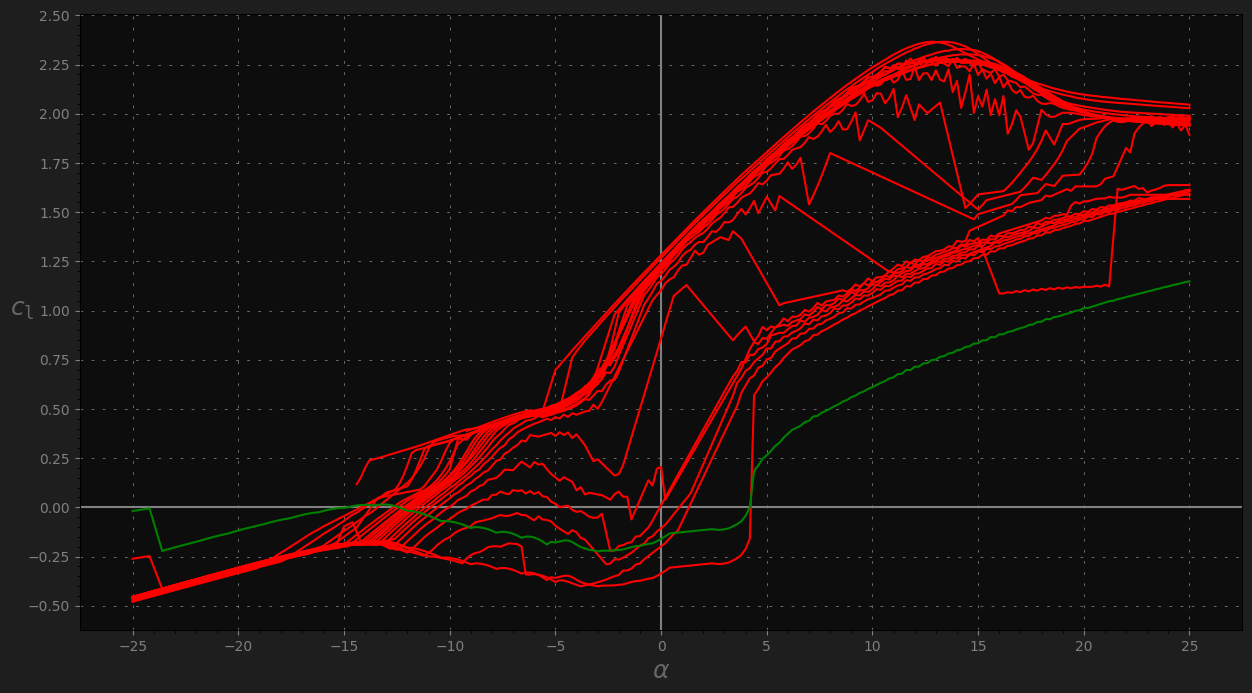

In [37]:
## plot
current_cm = colormap['Dark']
fig = plt.figure(figsize=(15,8))
fig.set_facecolor(current_cm['fig_facecolor'])
ax = fig.add_subplot(1,1,1)
ax.set_ylabel("$c_{\\mathtt{l}}$",rotation=0,color=current_cm['label_color'],fontsize=18)
ax.set_xlabel("$\\alpha$",color=current_cm['label_color'],fontsize=18)
ax.axvline(color=current_cm['axes_lines'])
ax.axhline(color=current_cm['axes_lines'])
ax.grid(which='major',linewidth=0.4,linestyle=(0, (5,15)))
ax.set_yticks(np.arange(-0.5,3,0.05),minor=True)
ax.set_yticks(np.arange(-0.5,3,0.25))
ax.set_xticks(alpha[0::5],minor=True)
ax.tick_params(axis='x', colors=current_cm['tick_color'])
ax.tick_params(axis='y', colors=current_cm['tick_color'])
ax.set_xticks(alpha[0::25])
ax.set_facecolor(current_cm['ax_facecolor'])
ax.plot(alpha,cl,color='red')
ax.plot(alpha,CL[:,0],color='green')

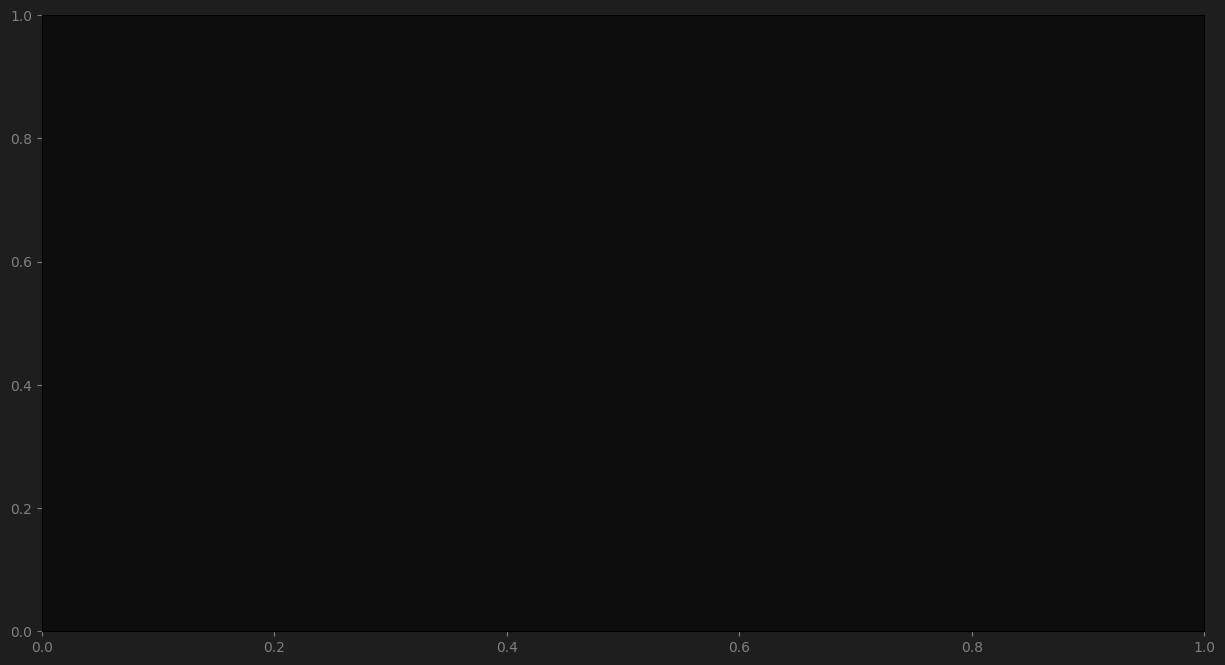

In [38]:
## plot
current_cm = colormap['Dark']
fig = plt.figure(figsize=(15,8))
fig.set_facecolor(current_cm['fig_facecolor'])
ax = fig.add_subplot(1,1,1)
for index,rey in enumerate(reynolds):
    ax.set_ylabel("$c_{\\mathtt{l}}$",rotation=0,color=current_cm['label_color'],fontsize=18)
    ax.set_xlabel("$\\alpha$",color=current_cm['label_color'],fontsize=18)
    ax.axvline(color=current_cm['axes_lines'])
    ax.axhline(color=current_cm['axes_lines'])
    ax.grid(which='major',linewidth=0.4,linestyle=(0, (5,15)))
    ax.set_yticks(np.arange(-0.5,3,0.05),minor=True)
    ax.set_yticks(np.arange(-0.5,3,0.25))
    ax.set_xticks(alpha[0::5],minor=True)
    ax.tick_params(axis='x', colors=current_cm['tick_color'])
    ax.tick_params(axis='y', colors=current_cm['tick_color'])
    ax.set_xticks(alpha[0::25])
    ax.set_facecolor(current_cm['ax_facecolor'])
    ax.plot(alpha,CL[:,index],color='#00ffff')
    ax.plot(alpha,cl[:,index],color='#00ff00')
    ax.plot(alpha,CD[:,index],color='#ff00ff')
    ax.plot(alpha,cd[:,index],color='#ff0000')
    ax.plot(alpha,CL[:,index]/CD[:,index]/8,color='#002fff')
    L0 = np.nanargmin(np.abs(cl[:,index]))
    E_max = np.nanargmax(CL[:,index]/CD[:,index])
    ax.set_title(f'Reynolds= {int(rey/1000)}e+3        Speed= {round(rey*AIR_VISCOSITY/AIR_DENSITY/MEAN_CHORD,2)} m/s        $\\alpha_{{L=0}}= {alpha[L0]}$°        $\\alpha_{{E_{{max}}}}= {alpha[E_max]}$°',color='white')

    ax.vlines(alpha[E_max], ymin=-0.25, ymax=1.25,color='#444444')
    fig.savefig(f'CL_CD/{str(int(rey/1000)).zfill(4)}.png')
    ax.clear()

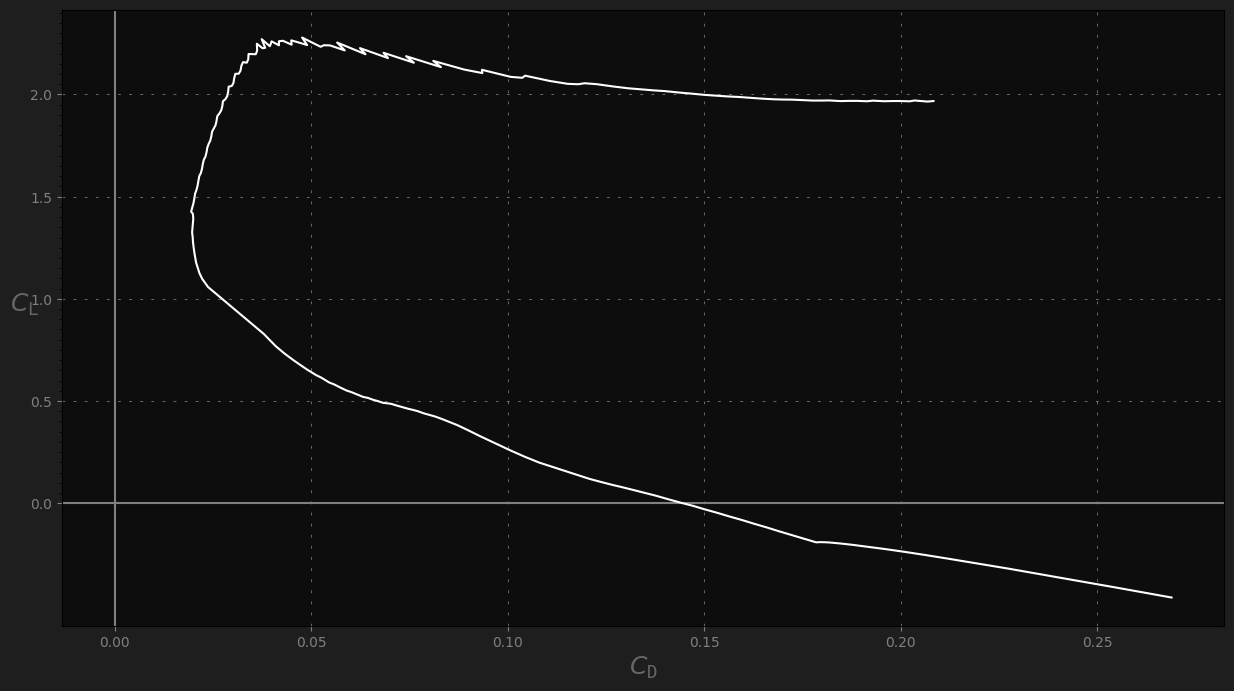

In [45]:
## plot
current_cm = colormap['Dark']
fig = plt.figure(figsize=(15,8))
fig.set_facecolor(current_cm['fig_facecolor'])
ax = fig.add_subplot(1,1,1)
ax.set_ylabel("$C_{\\mathtt{L}}$",rotation=0,color=current_cm['label_color'],fontsize=18)
ax.set_xlabel("$C_{\\mathtt{D}}$",color=current_cm['label_color'],fontsize=18)
ax.axvline(color=current_cm['axes_lines'])
ax.axhline(color=current_cm['axes_lines'])
ax.grid(which='major',linewidth=0.4,linestyle=(0, (5,15)))
ax.set_yticks(np.arange(0,3,0.05),minor=True)
ax.set_yticks(np.arange(0,3,0.5))
ax.set_xticks(np.arange(0,3,0.05),minor=True)
ax.set_xticks(np.arange(0,3,0.05))
ax.tick_params(axis='x', colors=current_cm['tick_color'])
ax.tick_params(axis='y', colors=current_cm['tick_color'])
ax.set_facecolor(current_cm['ax_facecolor'])
max_ef = np.argmax(cl/cd)
ax.plot(cd[:,12],cl[:,12],'w')

In [49]:
import importlib

In [52]:
import lift_coef
importlib.reload(lift_coef)

<module 'lift_coef' from 'c:\\Users\\HDIAS\\py\\14bits_calc\\Aerodynamics\\lift_coef.py'>

In [58]:
ar,L = lift_coef.lift(1.4,0.38,0.015)

In [60]:
L[np.nanargmin(np.abs(alpha-1)),np.nanargmin(np.abs(velocity-10.5))]/9.8

1.75176917564118

In [43]:
2/1.25

1.6

In [55]:
ar

5.157894736842104

In [57]:
0.15/0.3

0.5